<a href="https://colab.research.google.com/github/pratikagithub/DL-and-NLP/blob/main/Recurrent_Neural_Networks_(RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Recurrent neural networks (RNN)** are a class of neural networks that is powerful for modeling sequence data such as time series or natural language.

Schematically, a RNN layer uses a for loop to iterate over the timesteps of a sequence, while maintaining an internal state that encodes information about the timesteps it has seen so far.

The Keras RNN API is designed with a focus on:

Ease of use: the built-in keras.layers.RNN, keras.layers.LSTM, keras.layers.GRU layers enable you to quickly build recurrent models without having to make difficult configuration choices.

Ease of customization: You can also define your own RNN cell layer (the inner part of the for loop) with custom behavior, and use it with the generic keras.layers.RNN layer (the for loop itself). This allows you to quickly prototype different research ideas in a flexible way with minimal code.

In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers

**Built-in RNN layers: a simple example**

There are three built-in RNN layers in Keras:

keras.layers.SimpleRNN, a fully-connected RNN where the output from previous timestep is to be fed to next timestep.

keras.layers.GRU, first proposed in Cho et al., 2014.

keras.layers.LSTM, first proposed in Hochreiter & Schmidhuber, 1997.

In early 2015, Keras had the first reusable open-source Python implementations of LSTM and GRU.

Here is a simple example of a Sequential model that processes sequences of integers, embeds each integer into a 64-dimensional vector, then processes the sequence of vectors using a LSTM layer.

In [ ]:
model = keras.Sequential()
# add an embedding layer expecting input vocab of size 1000, and output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# add a LSTM layer with 128 internal units
model.add(layers.LSTM(128))

# add a dense layer with 10 units
model.add(layers.Dense(10))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Built-in RNNs support a number of useful features:**

Recurrent dropout, via the dropout and recurrent_dropout arguments
Ability to process an input sequence in reverse, via the go_backwards argument
Loop unrolling (which can lead to a large speedup when processing short sequences on CPU), via the unroll argument
...and more.
For more information, see the RNN API documentation.

**Outputs and states**

By default, the output of a RNN layer contains a single vector per sample. This vector is the RNN cell output corresponding to the last timestep, containing information about the entire input sequence. The shape of this output is (batch_size, units) where units corresponds to the units argument passed to the layer's constructor.

A RNN layer can also return the entire sequence of outputs for each sample (one vector per timestep per sample), if you set return_sequences=True. The shape of this output is (batch_size, timesteps, units).

In [ ]:
model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# the output of GRU will be a 3D tensor of shape(batch_size, timesteps, 256)
model.add(layers.GRU(256, return_sequences=True))

# the output of Simple RNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(128))

model.add(layers.Dense(10))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

n addition, a RNN layer can return its final internal state(s). The returned states can be used to resume the RNN execution later, or to initialize another RNN. This setting is commonly used in the encoder-decoder sequence-to-sequence model, where the encoder final state is used as the initial state of the decoder.

To configure a RNN layer to return its internal state, set the return_state parameter to True when creating the layer. Note that LSTM has 2 state tensors, but GRU only has one.

To configure the initial state of the layer, just call the layer with additional keyword argument initial_state. Note that the shape of the state needs to match the unit size of the layer, like in the example below.

In [ ]:
encoder_vocab = 1000
decoder_vocab = 2000

encoder_input = layers.Input(shape=(None,))
encoder_embedded = layers.Embedding(input_dim=encoder_vocab, output_dim=64)(
    encoder_input
)

# return states in addition to output
output, state_h, state_c = layers.LSTM(64, return_state=True, name="encoder")(
    encoder_embedded
)
encoder_state = [state_h, state_c]

decoder_input = layers.Input(shape=(None,))
decoder_embedded = layers.Embedding(input_dim = decoder_vocab, output_dim=64)(
    decoder_input
)

# pass the 2 states to a new LSTM layer, as initial state
decoder_output = layers.LSTM(64, name="decoder")(
    decoder_embedded, initial_state=encoder_state
)
output = layers.Dense(10)(decoder_output)

model = keras.Model([encoder_input, decoder_input], output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_9             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_10 (Embedding)  │ (None, None, 64)       │         64,000 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_11 (Embedding)  │ (None, None, 64)       │        128,000 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ encoder (LSTM)            │ [(None, 64), (None,    │         33,024 │ embedding_10[0][0]     │
│                           │ 64), (None, 64)]       │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ decoder (LSTM)            │ (None, 64)             │         33,024 │ embedding_11[0][0],    │
│                           │                        │                │ encoder[0][1],         │
│                           │                        │                │ encoder[0][2]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 10)             │            650 │ decoder[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 258,698 (1010.54 KB)

 Trainable params: 258,698 (1010.54 KB)

 Non-trainable params: 0 (0.00 B)

**RNN layers and RNN cells**

In addition to the built-in RNN layers, the RNN API also provides cell-level APIs. Unlike RNN layers, which processes whole batches of input sequences, the RNN cell only processes a single timestep.

The cell is the inside of the for loop of a RNN layer. Wrapping a cell inside a keras.layers.RNN layer gives you a layer capable of processing batches of sequences, e.g. RNN(LSTMCell(10)).

Mathematically, RNN(LSTMCell(10)) produces the same result as LSTM(10). In fact, the implementation of this layer in TF v1.x was just creating the corresponding RNN cell and wrapping it in a RNN layer. However using the built-in GRU and LSTM layers enable the use of CuDNN and you may see better performance.

There are three built-in RNN cells, each of them corresponding to the matching RNN layer.

keras.layers.SimpleRNNCell corresponds to the SimpleRNN layer.

keras.layers.GRUCell corresponds to the GRU layer.

keras.layers.LSTMCell corresponds to the LSTM layer.

The cell abstraction, together with the generic keras.layers.RNN class, make it very easy to implement custom RNN architectures for your research.

Cross-batch statefulness
When processing very long sequences (possibly infinite), you may want to use the pattern of cross-batch statefulness.

Normally, the internal state of a RNN layer is reset every time it sees a new batch (i.e. every sample seen by the layer is assumed to be independent of the past). The layer will only maintain a state while processing a given sample.

If you have very long sequences though, it is useful to break them into shorter sequences, and to feed these shorter sequences sequentially into a RNN layer without resetting the layer's state. That way, the layer can retain information about the entirety of the sequence, even though it's only seeing one sub-sequence at a time.

You can do this by setting stateful=True in the constructor.

If you have a sequence s = [t0, t1, ... t1546, t1547], you would split it into e.g.

s1 = [t0, t1, ... t100]

s2 = [t101, ... t201]

...

s16 = [t1501, ... t1547]

lstm_layer = layers.LSTM(64, stateful=True)

for s in sub_sequences:

  output = lstm_layer(s)

In [ ]:
paragraph1=np.random.random((20,10,50)).astype(np.float32)
paragraph2=np.random.random((20,10,50)).astype(np.float32)
paragraph3=np.random.random((20,10,50)).astype(np.float32)

lstm_layer = layers.LSTM(64, stateful=True)
output = lstm_layer(paragraph1)
output = lstm_layer(paragraph2)
output = lstm_layer(paragraph3)

# reset_states() will reset the cached state to original initial_state.
# if no initial_state was provided, zero-states will be used by default.
lstm_layer.reset_states()

RNN State Reuse

The recorded states of the RNN layer are not included in the layer.weights(). If you would like to reuse the state from a RNN layer, you can retrieve the states value by layer.states and use it as the initial state for a new layer via the Keras functional API like new_layer(inputs, initial_state=layer.states), or model subclassing.

Please also note that sequential model might not be used in this case since it only supports layers with single input and output, the extra input of initial state makes it impossible to use here.

In [ ]:
paragraph1 = np.random.random((20,10,50)).astype(np.float32)
paragraph2 = np.random.random((20,10,50)).astype(np.float32)
paragraph3 = np.random.random((20,10,50)).astype(np.float32)

lstm_layer = layers.LSTM(64, stateful=True)
output = lstm_layer(paragraph1)
output = lstm_layer(paragraph2)

existing_state = lstm_layer.states

new_lstm_layer = layers.LSTM(64)
new_output = new_lstm_layer(paragraph3, initial_state=existing_state)

**Bidirectional RNNs**

For sequences other than time series (e.g. text), it is often the case that a RNN model can perform better if it not only processes sequence from start to end, but also backwards. For example, to predict the next word in a sentence, it is often useful to have the context around the word, not only just the words that come before it.

Keras provides an easy API for you to build such bidirectional RNNs: the keras.layers.Bidirectional wrapper.

In [ ]:
model = keras.Sequential()

model.add(
    layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(5,10))
)
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(10))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 5, 128)              │          38,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,266 (313.54 KB)

 Trainable params: 80,266 (313.54 KB)

 Non-trainable params: 0 (0.00 B)

Under the hood, Bidirectional will copy the RNN layer passed in, and flip the go_backwards field of the newly copied layer, so that it will process the inputs in reverse order.

The output of the Bidirectional RNN will be, by default, the concatenation of the forward layer output and the backward layer output. If you need a different merging behavior, e.g. concatenation, change the merge_mode parameter in the Bidirectional wrapper constructor. For more details about Bidirectional, please check the API docs.

**Performance optimization and CuDNN kernels**

In TensorFlow 2.0, the built-in LSTM and GRU layers have been updated to leverage CuDNN kernels by default when a GPU is available. With this change, the prior keras.layers.CuDNNLSTM/CuDNNGRU layers have been deprecated, and you can build your model without worrying about the hardware it will run on.

Since the CuDNN kernel is built with certain assumptions, this means the layer will not be able to use the CuDNN kernel if you change the defaults of the built-in LSTM or GRU layers. E.g.:

Changing the activation function from tanh to something else.
Changing the recurrent_activation function from sigmoid to something else.
Using recurrent_dropout > 0.
Setting unroll to True, which forces LSTM/GRU to decompose the inner tf.while_loop into an unrolled for loop.
Setting use_bias to False.
Using masking when the input data is not strictly right padded (if the mask corresponds to strictly right padded data, CuDNN can still be used. This is the most common case).
For the detailed list of constraints, please see the documentation for the LSTM and GRU layers.

**Using CuDNN kernels when available**

Let's build a simple LSTM model to demonstrate the performance difference.

We'll use as input sequences the sequence of rows of MNIST digits (treating each row of pixels as a timestep), and we'll predict the digit's label.

In [1]:
batch_size = 64
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 28

units = 64
output_size = 10  # labels are from 0 to 9


# Build the RNN model
def build_model(allow_cudnn_kernel=True):
    # CuDNN is only available at the layer level, and not at the cell level.
    # This means `LSTM(units)` will use the CuDNN kernel,
    # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
    if allow_cudnn_kernel:
        # The LSTM layer with default options uses CuDNN.
        lstm_layer = keras.layers.LSTM(units, input_shape=(None, input_dim))
    else:
        # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
        lstm_layer = keras.layers.RNN(
            keras.layers.LSTMCell(units), input_shape=(None, input_dim)
        )
    model = keras.models.Sequential(
        [
            lstm_layer,
            keras.layers.BatchNormalization(),
            keras.layers.Dense(output_size),
        ]
    )
    return model

Lets load the MNIST dataset:

In [5]:
from tensorflow import keras
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
sample, sample_label = x_train[0], y_train[0]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Let's create a model instance and train it.

We choose sparse_categorical_crossentropy as the loss function for the model. The output of the model has shape of [batch_size, 10]. The target for the model is an integer vector, each of the integer is in the range of 0 to 9.

In [7]:
model = build_model(allow_cudnn_kernel=True)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.5599 - loss: 1.3627 - val_accuracy: 0.7574 - val_loss: 0.7171


Now, let's compare to a model that does not use the CuDNN kernel:

In [8]:
noncudnn_model = build_model(allow_cudnn_kernel=False)
noncudnn_model.set_weights(model.get_weights())
noncudnn_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)
noncudnn_model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=1
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8610 - loss: 0.4607 - val_accuracy: 0.8963 - val_loss: 0.3195


When running on a machine with a NVIDIA GPU and CuDNN installed, the model built with CuDNN is much faster to train compared to the model that uses the regular TensorFlow kernel.

The same CuDNN-enabled model can also be used to run inference in a CPU-only environment. The tf.device annotation below is just forcing the device placement. The model will run on CPU by default if no GPU is available.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Predicted result is: [3], target result is: 5


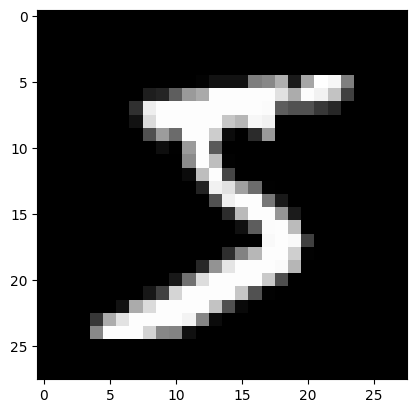

In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf
with tf.device("CPU:0"):
  cpu_model = build_model(allow_cudnn_kernel=True)
  cpu_model.set_weights(model.get_weights())
  result = tf.argmax(cpu_model.predict_on_batch(tf.expand_dims(sample, 0)), axis=1)
  print(
      "Predicted result is: %s, target result is: %s" % (result.numpy(), sample_label)
  )
  plt.imshow(sample, cmap=plt.get_cmap("gray"))

**RNNs with list/dict inputs, or nested inputs**

Nested structures allow implementers to include more information within a single timestep. For example, a video frame could have audio and video input at the same time. The data shape in this case could be:

[batch, timestep, {"video": [height, width, channel], "audio": [frequency]}]

In another example, handwriting data could have both coordinates x and y for the current position of the pen, as well as pressure information. So the data representation could be:

[batch, timestep, {"location": [x, y], "pressure": [force]}]

The following code provides an example of how to build a custom RNN cell that accepts such structured inputs.

Define a custom cell that supports nested input/output
See Making new Layers & Models via subclassing for details on writing your own layers.

**Build a RNN model with nested input/output**

Let's build a Keras model that uses a keras.layers.RNN layer and the custom cell we just defined.

In [32]:
from tensorflow.keras import layers, models, Input
import tensorflow as tf

class NestedCell(layers.Layer):
    def __init__(self, unit_1, unit_2, unit_3, **kwargs):
        super(NestedCell, self).__init__(**kwargs)
        self.unit_1 = unit_1
        self.unit_2 = unit_2
        self.unit_3 = unit_3
        self.state_size = [unit_1, unit_2, unit_3]

        # Define layers for processing inputs
        self.dense_1 = layers.Dense(unit_1)
        self.dense_2 = layers.Dense(unit_2)
        self.dense_3 = layers.Dense(unit_3)

    def build(self, input_shape):
        # We expect a single concatenated input shape here
        self.input_dim = input_shape[-1]

    def call(self, inputs, states):
        # Split the concatenated inputs into two parts
        input_1, input_2 = tf.split(inputs, [self.unit_1, self.unit_2 * self.unit_3], axis=-1)

        # Process the split inputs as required
        output_1 = self.dense_1(input_1)
        output_2 = self.dense_2(input_2)

        # Update and return states
        new_state_1 = output_1 + states[0]
        new_state_2 = output_2 + states[1]
        new_state_3 = self.dense_3(new_state_2) + states[2]

        return new_state_3, [new_state_1, new_state_2, new_state_3]

# Parameters
unit_1, unit_2, unit_3 = 10, 20, 30
i1, i2, i3 = 32, 64, 32

# Instantiate the cell and RNN layer
cell = NestedCell(unit_1, unit_2, unit_3)
rnn = layers.RNN(cell)

# Define and concatenate inputs
input_1 = Input((None, i1))
input_2 = Input((None, i2 * i3))
concatenated_input = layers.Concatenate()([input_1, input_2])

# Build and compile the model
outputs = rnn(concatenated_input)
model = models.Model(inputs=[input_1, input_2], outputs=outputs)
model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])


**Train the model with randomly generated data**

Since there isn't a good candidate dataset for this model, we use random Numpy data for demonstration.

In [35]:
from tensorflow.keras import layers, models, Input
import tensorflow as tf

class NestedCell(layers.Layer):
    def __init__(self, unit_1, unit_2, unit_3, **kwargs):
        super(NestedCell, self).__init__(**kwargs)
        self.unit_1 = unit_1
        self.unit_2 = unit_2
        self.unit_3 = unit_3
        self.state_size = [unit_1, unit_2, unit_3]

        # Define layers for processing inputs
        self.dense_1 = layers.Dense(unit_1)
        self.dense_2 = layers.Dense(unit_2)
        self.dense_3 = layers.Dense(unit_3)

    def build(self, input_shape):
        # We expect a single concatenated input shape here
        self.input_dim = input_shape[-1]

    def call(self, inputs, states):
        # Split the concatenated inputs into two parts
        input_1, input_2 = tf.split(inputs, [self.unit_1, self.unit_2 * self.unit_3], axis=-1)

        # Process the split inputs as required
        output_1 = self.dense_1(input_1)
        output_2 = self.dense_2(input_2)

        # Update and return states
        new_state_1 = output_1 + states[0]
        new_state_2 = output_2 + states[1]
        new_state_3 = self.dense_3(new_state_2) + states[2]

        return new_state_3, [new_state_1, new_state_2, new_state_3]

# Parameters
unit_1, unit_2, unit_3 = 10, 20, 30
i1, i2, i3 = 32, 64, 32

# Instantiate the cell and RNN layer
cell = NestedCell(unit_1, unit_2, unit_3)
rnn = layers.RNN(cell)

# Define and concatenate inputs with reshaping for input_2
input_1 = Input((None, i1))
input_2 = Input((None, i2, i3))
reshaped_input_2 = layers.Reshape((-1, i2 * i3))(input_2)
concatenated_input = layers.Concatenate()([input_1, reshaped_input_2])

# Build and compile the model
outputs = rnn(concatenated_input)
model = models.Model(inputs=[input_1, input_2], outputs=outputs)
model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])


With the Keras keras.layers.RNN layer, You are only expected to define the math logic for individual step within the sequence, and the keras.layers.RNN layer will handle the sequence iteration for you. It's an incredibly powerful way to quickly prototype new kinds of RNNs (e.g. a LSTM variant).